## Precipitation - pr

In [1]:
import xarray as xr
import numpy as np

import skimage.measure as skm
import matplotlib.pyplot as plt
import cartopy

import os
home = os.path.expanduser("~")

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

In [2]:
from plotFuncs import *

### one dataset

In [4]:
variable = 'precip'

models = [
    # 'IPSL-CM5A-MR', # 1
    # 'GFDL-CM3',     # 2
    # 'GISS-E2-H',    # 3
    # 'bcc-csm1-1',   # 4
    # 'CNRM-CM5',     # 5
    # 'CCSM4',        # 6
    # 'HadGEM2-AO',   # 7
    # 'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9
    # 'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    'inmcm4',       # 13
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19
    ]

observations = [
    # 'GPCP'
    ]

datasets = models + observations

resolutions = [
    # 'original',
    'regridded'
    ]

experiments =[
    'historical',
    # 'rcp85'
    ]

for dataset in datasets:
    for resolution in resolutions:
        for experiment in experiments:
            print('variable:{}, dataset:{}, experiment:{}, resolution:{}'.format(variable, dataset, experiment, resolution))
            ds = get_dsvariable(variable, dataset, resolution, experiment, home)
ds

In [5]:
data = ds[variable]
has_nan = np.isnan(data).any()
print('characteristics')
print('hasNaN:', has_nan.data)
print('max', data.max().data)
print('min', data.min().data)
print('mean', data.mean().data)

characteristics
hasNaN: False
max 93.61214447021484
min -0.06245221197605133
mean 3.8102698


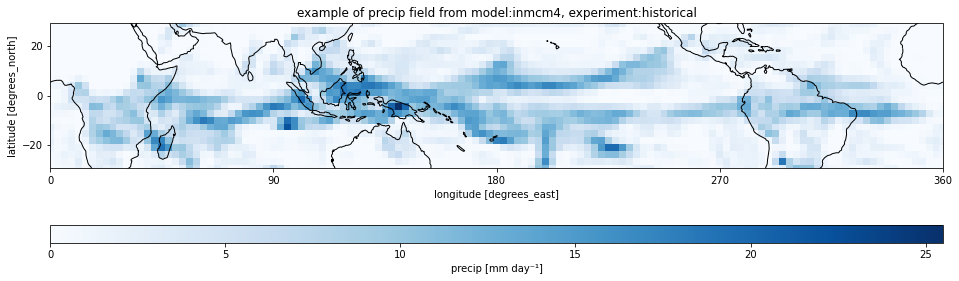

In [6]:
# variable = 'snapshot'

scene = data.isel(time=0)
title = 'example of {} field from model:{}, experiment:{}'.format(variable, dataset, experiment)
cmap = 'Blues'
plot_scene(scene, cmap=cmap, title = title)

In [7]:
# variable = 'sMean'

aWeights = np.cos(np.deg2rad(data.lat))
y= data.weighted(aWeights).mean(dim=('lat','lon'))
title = 'spatial mean of {} field from model:{}, experiment:{}'.format(variable, dataset, experiment)
xlabel = 'day [Nb, {} - {}]'.format(str(data.isel(time=0).coords['time'].values)[:10], str(data.isel(time=-1).coords['time'].values)[:10])
ylabel = 'pr [{}]'.format(data.units)
plot_timeseries(y, title=title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

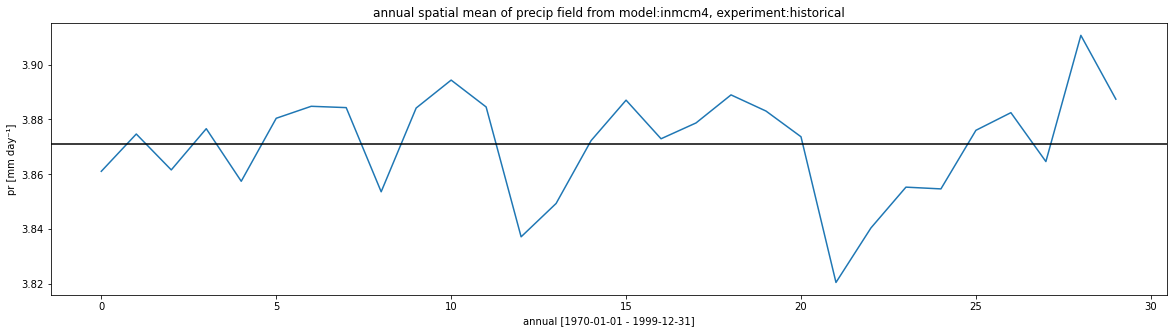

In [ ]:
# variable = 'sMean'

timeMean_option = [
    'annual',
    # 'seasonal',
    # 'monthly',
    # 'daily'
    ]

aWeights = np.cos(np.deg2rad(data.lat))
y= data.weighted(aWeights).mean(dim=('lat','lon'))
title = '{} spatial mean of {} field from model:{}, experiment:{}'.format(timeMean_option[0], variable, dataset, experiment)
xlabel = '{} [{} - {}]'.format(timeMean_option[0], str(data.isel(time=0).coords['time'].values)[:10], str(data.isel(time=-1).coords['time'].values)[:10])
ylabel = 'pr [{}]'.format(data.units)


plot_timeseries(y, title=title, timeMean_option=timeMean_option)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

if timeMean_option[0]=='seasonal':
    plt.legend()

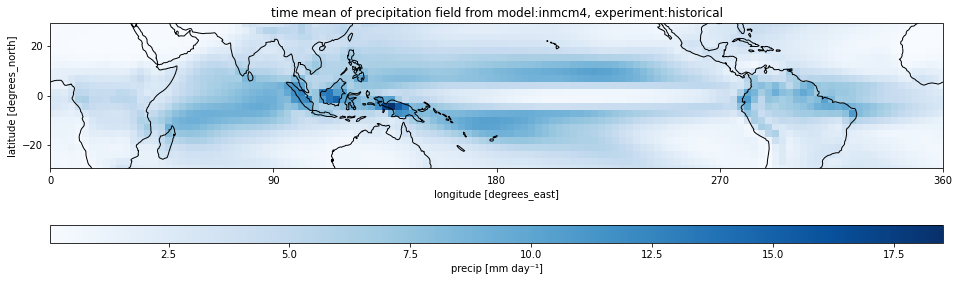

In [ ]:
# variable = 'tMean'

title = 'time mean of precipitation field from model:{}, experiment:{}'.format(dataset, experiment)
plot_scene(data.mean(dim='time', keep_attrs=True), cmap='Blues', title = title)

In [ ]:
# variable = 'sMean'
aWeights = np.cos(np.deg2rad(data.lat))
data.mean(dim='time', keep_attrs=True).weighted(aWeights).mean(dim=('lat','lon'), keep_attrs=True)

<xarray.DataArray 'precip' ()>
array(3.87112962)
Attributes:
    regrid_method:  conservative
    units:          mm day⁻¹

In [ ]:
# anomaly_option = [
#     # 'seasonal',
#     'monthly',
#     ]

# aWeights = np.cos(np.deg2rad(data.lat))

# y= data.weighted(aWeights).mean(dim=('lat','lon'))
# title = '{} spatial mean of precipitation field from model:{}, experiment:{}'.format(timeMean_option[0], models[0], experiment)

# plot_bar(y, anomaly_option=anomaly_option)

In [ ]:
# run all above from this cell

### comparing datasets

In [ ]:
variable = 'precip'

models = [
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    'GISS-E2-H',    # 3
    'bcc-csm1-1',   # 4
    'CNRM-CM5',     # 5
    'CCSM4',        # 6
    'HadGEM2-AO',   # 7
    'BNU-ESM',      # 8
    'EC-EARTH',     # 9
    'FGOALS-g2',    # 10
    'MPI-ESM-MR',   # 11
    'CMCC-CM',      # 12
    'inmcm4',       # 13
    'NorESM1-M',    # 14
    'CanESM2',      # 15
    'MIROC5',       # 16
    'HadGEM2-CC',   # 17
    'MRI-CGCM3',    # 18
    'CESM1-BGC'     # 19
    ]

observations = [
    'GPCP' # 20
    ]

datasets = models + observations

resolution = [
    # 'original',
    'regridded'
    ]

experiments =[
    'historical',
    # 'rcp85'
    ]

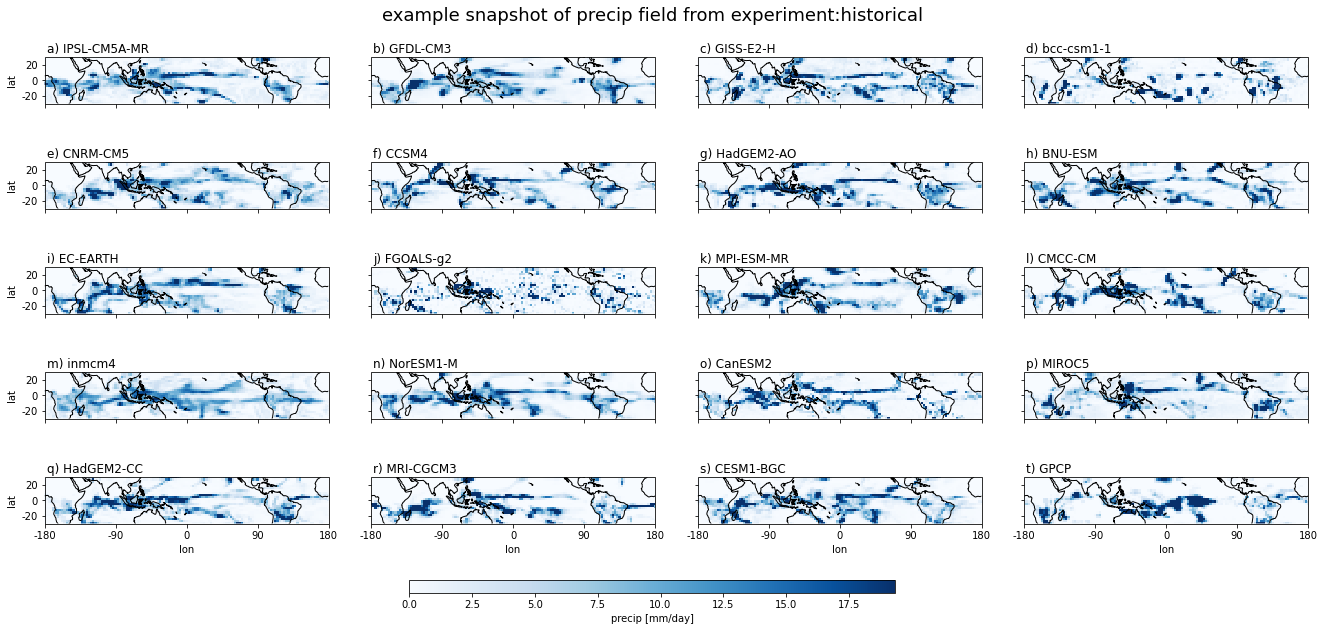

In [ ]:
# variable = 'snapshot'

absolute_limits = True
quantile_low = 0
quantile_high = 0.95
if absolute_limits:
    vmin, vmax = [], []
    for dataset in datasets:
        for resolution in resolutions:
            for experiment in experiments:

                data = get_dsvariable(variable, dataset, resolution, experiment)[variable].isel(time=0)
                y= data
                
                vmin = np.append(vmin, np.quantile(y, quantile_low))
                vmax = np.append(vmax, np.quantile(y, quantile_high))

    vmin = np.min(vmin)
    vmax = np.max(vmax)

else:
    vmin, vmax = None, None 


fig= plt.figure(figsize=(22.5,17.5))
title = 'example snapshot of {} field from experiment:{}'.format(variable, experiment)

fig.suptitle(title, fontsize=18, x= 0.575, y=0.80)

for i, dataset in enumerate(datasets):
    for resolution in resolutions:
        for experiment in experiments:
            ax= fig.add_subplot(5,4,i+1,projection=cartopy.crs.PlateCarree(central_longitude=180))

            data = get_dsvariable(variable, dataset, resolution, experiment)[variable].isel(time=0)
            cmap = 'Blues'
            
            y = data

            pcm = plot_scene(y, cmap=cmap, ax=ax, vmin=vmin, vmax=vmax)
            letters='abcdefghijklmnopqrst'
            plt.text(-177.5, 35, letters[i] + ') ' + dataset, fontsize=12)
            ax.set_xticks([-180, -90, 0, 90, 180])
            ax.set_yticks([-20, 0, 20])
            ax.set_xticklabels('')
            ax.set_yticklabels('')

            if (len(datasets)-i)<=4:
                xlabel = 'lon'
                plt.xlabel(xlabel)
                ax.set_xticklabels([-180, -90, 0, 90, 180])

            if i== 0 or i==4 or i==8 or i==12 or i==16:
                ylabel = 'lat'
                plt.ylabel(ylabel)
                ax.set_yticklabels([-20, 0, 20])

plt.subplots_adjust(left=0.2, bottom=0.2, right=0.98, top=0.95, wspace=0.15, hspace=-0.8)
cbar_ax = fig.add_axes([0.425, 0.335, 0.3, 0.01])
cbar = fig.colorbar(pcm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('{} [{}]'.format(variable, y.units))

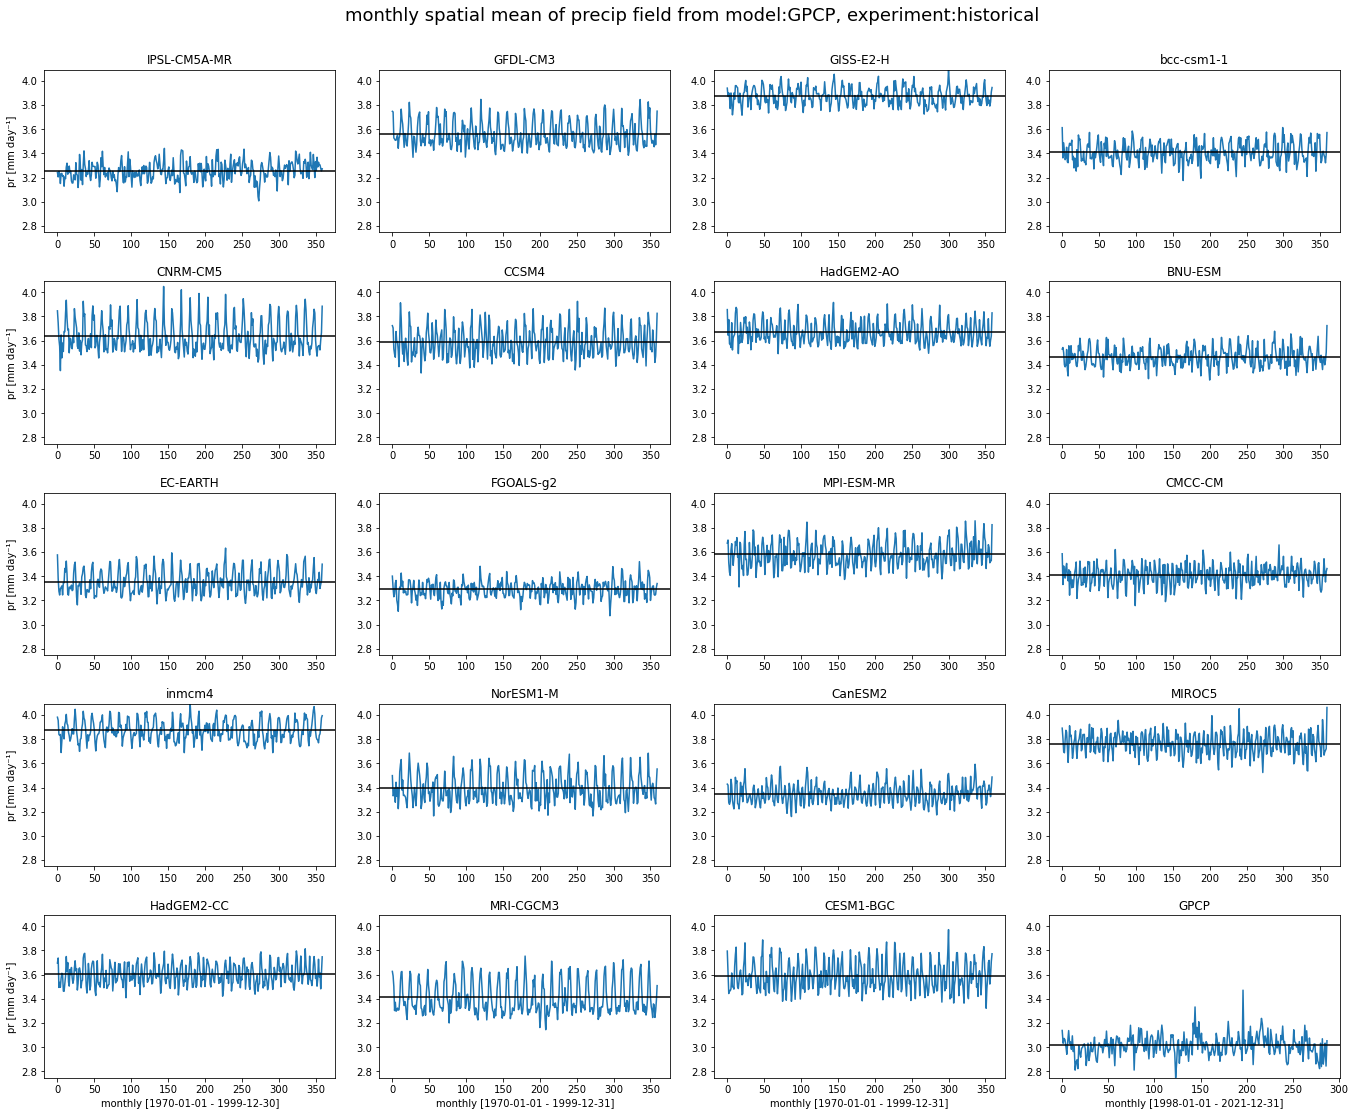

In [ ]:
# variable = 'sMean'

timeMean_option = [
    # 'annual',
    # 'seasonal',
    'monthly',
    # 'daily'
    ]

# create annual, seasonal, and monthly from daily variable later

absolute_limits = True
quantile_low = 0
quantile_high = 1
if absolute_limits:
    vmin, vmax = [], []
    for dataset in datasets:
        for resolution in resolutions:
            for experiment in experiments:

                data = get_dsvariable(variable, dataset, resolution, experiment)[variable]
                aWeights = np.cos(np.deg2rad(data.lat))
                y = data.weighted(aWeights).mean(dim=('lat','lon'))

                if timeMean_option[0] == 'annual':
                    y = y.resample(time='Y').mean(dim='time', keep_attrs=True)

                if timeMean_option[0] == 'seasonal':
                    y = y.resample(time='QS-DEC').mean(dim="time")
                    y = to_monthly(y)
                    y = y.rename({'month':'season'})
                    y = y.assign_coords(season = ["MAM", "JJA", "SON", "DJF"])
                    y = y.isel(year=slice(1, None))

                if timeMean_option[0] == 'monthly':
                    y = y.resample(time='M').mean(dim='time', keep_attrs=True)

                if timeMean_option[0] == 'daily':
                    y = y

                vmin = np.append(vmin, np.quantile(y, quantile_low))
                vmax = np.append(vmax, np.quantile(y, quantile_high))

    vmin = np.min(vmin)
    vmax = np.max(vmax)

else:
    vmin, vmax = None, None 


fig= plt.figure(figsize=(22.5,17.5))
title = '{} spatial mean of {} field from model:{}, experiment:{}'.format(timeMean_option[0], variable, dataset, experiment)

fig.suptitle(title, fontsize=18, y=0.95)

for i, dataset in enumerate(datasets):
    for resolution in resolutions:
        for experiment in experiments:
            ax= fig.add_subplot(5,4,i+1)

            ds = get_dsvariable(variable, dataset, resolution, experiment)
            data = ds[variable]

            if len(np.shape(data))>2:
                aWeights = np.cos(np.deg2rad(data.lat))
                y= data.weighted(aWeights).mean(dim=('lat','lon'))
            else:
                y = data

            title = dataset
            plot_timeseries(y, title=title, timeMean_option=timeMean_option, ax=ax, ymin=vmin, ymax=vmax)

            if (len(datasets)-i)<=4:
                xlabel = '{} [{} - {}]'.format(timeMean_option[0], str(data.isel(time=0).coords['time'].values)[:10], str(data.isel(time=-1).coords['time'].values)[:10])
                plt.xlabel(xlabel)

                if timeMean_option[0]=='seasonal':
                    plt.legend()

            if i== 0 or i==4 or i==8 or i==12 or i==16:
                ylabel = 'pr [{}]'.format(data.units)
                plt.ylabel(ylabel)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.3)

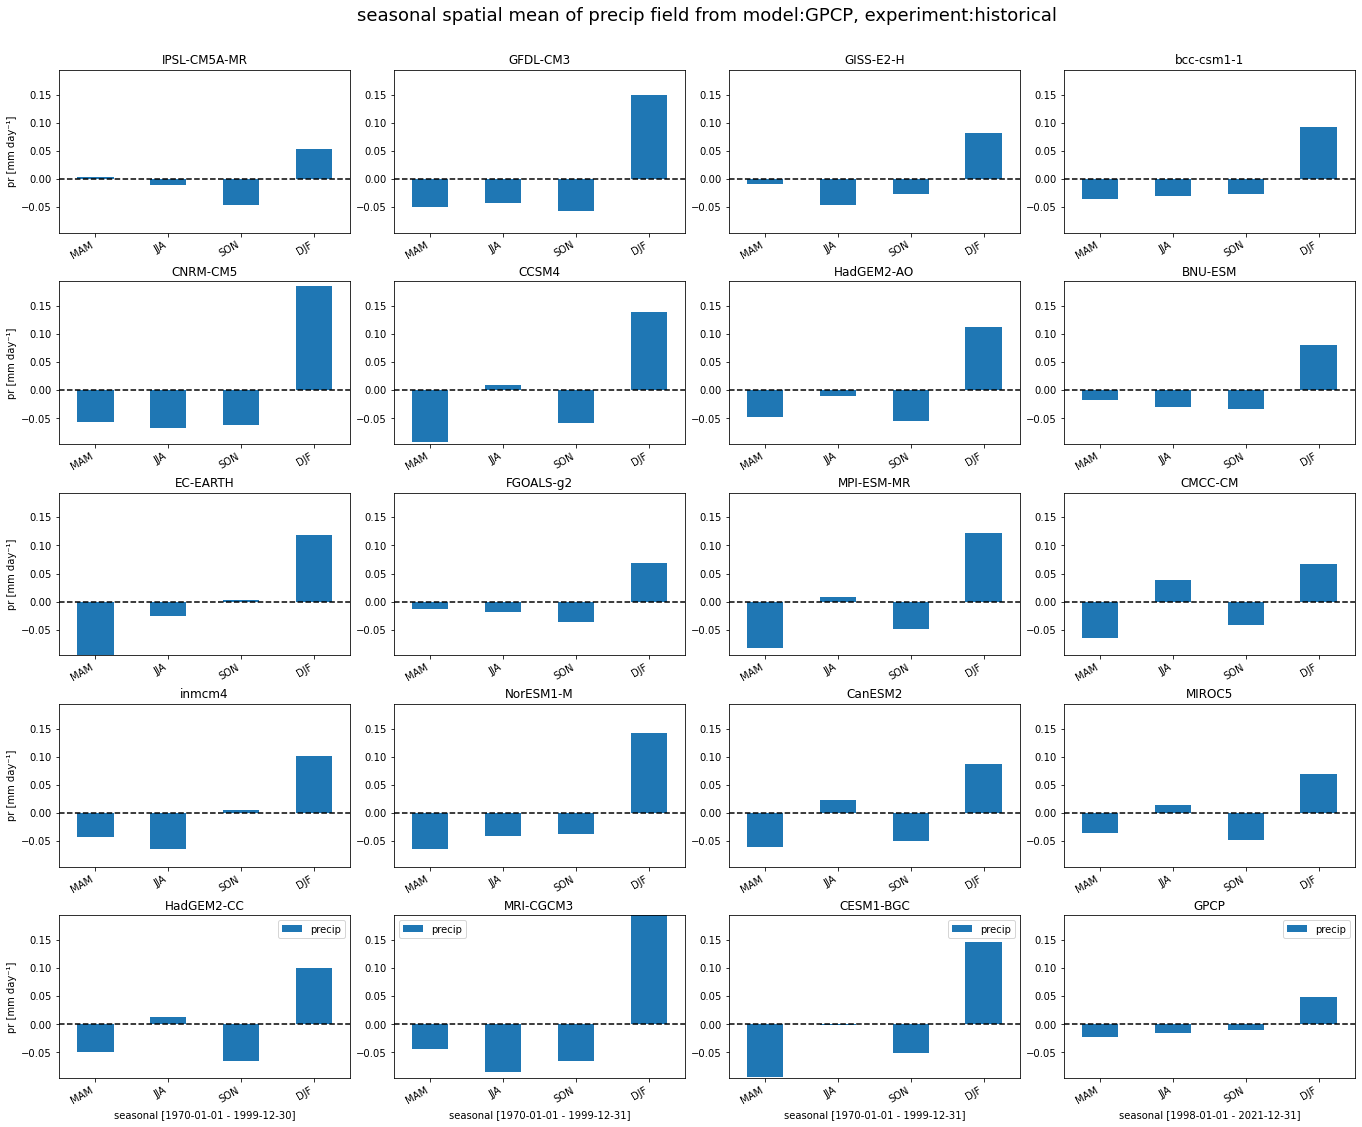

In [ ]:
# variable = 'sMean'

timeMean_option = [
    'seasonal',
    # 'monthly',
    ]

absolute_limits = True
quantile_low = 0
quantile_high = 1
if absolute_limits:
    vmin, vmax = [], []
    for dataset in datasets:
        for resolution in resolutions:
            for experiment in experiments:

                data = get_dsvariable(variable, dataset, resolution, experiment)[variable]
                aWeights = np.cos(np.deg2rad(data.lat))
                y = data.weighted(aWeights).mean(dim=('lat','lon'))

                if timeMean_option[0] == 'seasonal':
                    y = y.resample(time='QS-DEC').mean(dim="time")
                    y = to_monthly(y)
                    y = y.rename({'month':'season'})
                    y = y.assign_coords(season = ["MAM", "JJA", "SON", "DJF"])
                    y = y.isel(year=slice(1, None))
                    y= (y.mean(dim='year') - y.mean(dim='year').mean(dim='season'))

                if timeMean_option[0] == 'monthly':
                    y = to_monthly(y)
                    y = y.assign_coords(month = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul','aug', 'sep', 'oct', 'nov', 'dec'])
                    y= (y.mean(dim='year') - y.mean(dim='year').mean(dim='month'))

                vmin = np.append(vmin, np.quantile(y, quantile_low))
                vmax = np.append(vmax, np.quantile(y, quantile_high))

    vmin = np.min(vmin)
    vmax = np.max(vmax)

else:
    vmin, vmax = None, None 


fig= plt.figure(figsize=(22.5,17.5))
title = '{} spatial mean of {} field from model:{}, experiment:{}'.format(timeMean_option[0], variable, dataset, experiment)

fig.suptitle(title, fontsize=18, y=0.95)

for i, dataset in enumerate(datasets):
    for resolution in resolutions:
        for experiment in experiments:
            ax= fig.add_subplot(5,4,i+1)

            ds = get_dsvariable(variable, dataset, resolution, experiment)
            data = ds[variable]

            if len(np.shape(data))>2:
                aWeights = np.cos(np.deg2rad(data.lat))
                y= data.weighted(aWeights).mean(dim=('lat','lon'))
            else:
                y = data

            title = dataset
            plot_bar(y, timeMean_option=timeMean_option, title=title, ax=ax, ymin=vmin, ymax=vmax)
            plt.xlabel('')
            plt.ylim(vmin, vmax)

            if (len(datasets)-i)<=4:
                xlabel = '{} [{} - {}]'.format(timeMean_option[0], str(data.isel(time=0).coords['time'].values)[:10], str(data.isel(time=-1).coords['time'].values)[:10])
                plt.xlabel(xlabel)

                if timeMean_option[0]=='seasonal':
                    plt.legend()

            if i== 0 or i==4 or i==8 or i==12 or i==16:
                ylabel = 'pr [{}]'.format(data.units)
                plt.ylabel(ylabel)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.3)


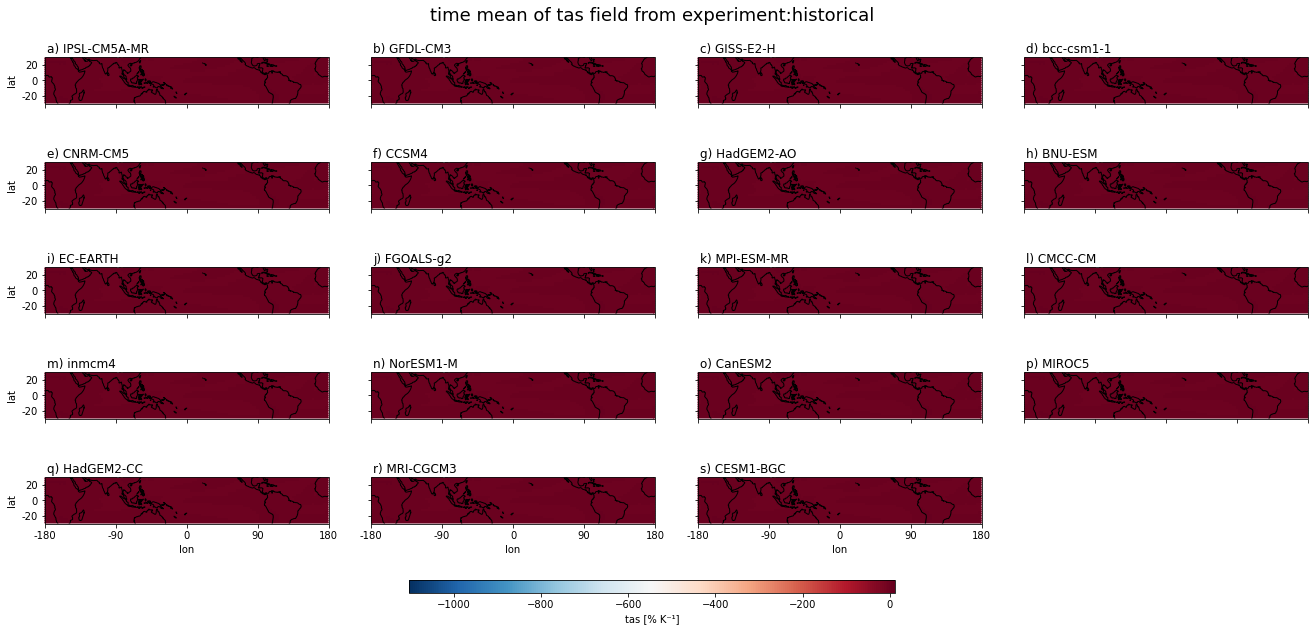

In [ ]:
# variable = 'tMean'

scene_types = [
    # 'experiment',
    'difference'
    ]

absolute_limits = True
quantile_low = 0
quantile_high = 0.99
if absolute_limits:
    vmin, vmax = [], []
    for dataset in datasets:
        for resolution in resolutions:
            for experiment in experiments:

                if scene_types[0] == 'experiment':
                    y = get_dsvariable(variable, dataset, resolution, experiment)[variable].mean(dim='time')

                elif scene_types[0] == 'difference':

                    if dataset == 'GPCP':
                        continue
                    
                    data_historical = get_dsvariable(variable, dataset, resolution, experiment='historical')[variable].mean(dim='time')
                    data_rcp = get_dsvariable(variable, dataset, resolution, experiment='rcp85')[variable].mean(dim='time')

                    aWeights = np.cos(np.deg2rad(data_historical.lat))
                    tas_historical = get_dsvariable(variable='tas', dataset=dataset, resolution=resolution, experiment='historical')['tas'].weighted(aWeights).mean(dim=('time','lat','lon'))
                    tas_rcp85 = get_dsvariable(variable='tas', dataset=dataset, resolution=resolution, experiment='rcp85')['tas'].weighted(aWeights).mean(dim=('time','lat','lon'))
                    tasdiff = tas_rcp85 - tas_historical

                    datadiff = data_rcp - data_historical
                    datadiff = datadiff*100/data_historical
                    datadiff = datadiff/tasdiff

                    y= datadiff

                vmin = np.append(vmin, np.quantile(y, quantile_low))
                vmax = np.append(vmax, np.quantile(y, quantile_high))

    vmin = np.min(vmin)
    vmax = np.max(vmax)

else:
    vmin, vmax = None, None 


fig= plt.figure(figsize=(22.5,17.5))
title = 'time mean of {} field from experiment:{}'.format(variable, experiment)

fig.suptitle(title, fontsize=18, x= 0.575, y=0.80)

for i, dataset in enumerate(datasets):
    for resolution in resolutions:
        for experiment in experiments:
            ax= fig.add_subplot(5,4,i+1,projection=cartopy.crs.PlateCarree(central_longitude=180))

            if scene_types[0] == 'experiment':
                y = get_dsvariable(variable, dataset, resolution, experiment)[variable].mean(dim=('time'),keep_attrs=True)
                cmap = 'Blues'

            if scene_types[0] == 'difference':

                if dataset == 'GPCP':
                    ax.remove()
                    continue

                data_historical = get_dsvariable(variable, dataset, resolution, experiment='historical')[variable].mean(dim='time')
                data_rcp = get_dsvariable(variable, dataset, resolution, experiment='rcp85')[variable].mean(dim='time')

                aWeights = np.cos(np.deg2rad(data_historical.lat))
                tas_historical = get_dsvariable(variable='tas', dataset=dataset, resolution=resolution, experiment='historical')['tas'].weighted(aWeights).mean(dim=('time','lat','lon'))
                tas_rcp85 = get_dsvariable(variable='tas', dataset=dataset, resolution=resolution, experiment='rcp85')['tas'].weighted(aWeights).mean(dim=('time','lat','lon'))
                tasdiff = tas_rcp85 - tas_historical

                datadiff1 = data_rcp - data_historical
                datadiff2 = datadiff1*100/data_historical
                datadiff3 = datadiff2/tasdiff

                datadiff.attrs['units'] = '% K'+ chr(0x207B) + chr(0x00B9) 

                y= datadiff
                cmap = 'RdBu_r'

            pcm = plot_scene(y, cmap=cmap, ax=ax, vmin=vmin, vmax=vmax)
            letters='abcdefghijklmnopqrst'
            plt.text(-177.5, 35, letters[i] + ') ' + dataset, fontsize=12)

            ax.set_xticks([-180, -90, 0, 90, 180])
            ax.set_yticks([-20, 0, 20])
            ax.set_xticklabels('')
            ax.set_yticklabels('')

            if (len(datasets)-i)<=4:
                xlabel = 'lon'
                plt.xlabel(xlabel)
                ax.set_xticklabels([-180, -90, 0, 90, 180])

            if i== 0 or i==4 or i==8 or i==12 or i==16:
                ylabel = 'lat'
                plt.ylabel(ylabel)
                ax.set_yticklabels([-20, 0, 20])


plt.subplots_adjust(left=0.2, bottom=0.2, right=0.98, top=0.95, wspace=0.15, hspace=-0.8)
cbar_ax = fig.add_axes([0.425, 0.335, 0.3, 0.01])
cbar = fig.colorbar(pcm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('{} [{}]'.format(variable, y.units))


In [ ]:
variable = 'tas'
dataset = 'GFDL-CM3'
resolution = 'regridded'
experiment = 'historical'

folder_model = '{}/Documents/data/CMIP5/ds_cmip5/{}'.format(home,dataset)
fileName_model = dataset + '_' + variable + '_' + experiment + '.nc'
path1 = os.path.join(folder_model, fileName_model)
ds = xr.open_dataset(path1)
ds


<xarray.Dataset>
Dimensions:  (time: 10950, lat: 22, lon: 128)
Coordinates:
  * time     (time) object 1970-01-01 12:00:00 ... 1999-12-31 12:00:00
    height   float64 ...
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Data variables:
    tas      (time, lat, lon) float32 ...
Attributes: (12/27)
    title:                  NOAA GFDL GFDL-CM3, historical (run 1) experiment...
    institute_id:           NOAA GFDL
    source:                 GFDL-CM3 2010 atmosphere: AM3 (AM3p9,C48L48); sea...
    contact:                gfdl.climate.model.info@noaa.gov
    project_id:             CMIP5
    table_id:               Table day (31 Jan 2011)
    ...                     ...
    parent_experiment_id:   piControl
    physics_version:        1
    product:                output1
    institution:            NOAA GFDL(201 Forrestal Rd, Princeton, NJ, 08540)
    history:                File was processed by fremetar (GFDL analog of CM...
    parent_experiment_rip:  r1i1p1

Text(0, 0.5, 'precip [mm/day]')

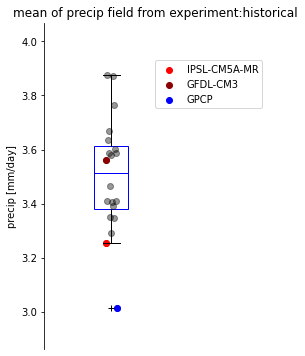

In [ ]:
labels =[
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    # 'GISS-E2-H',    # 3
    # 'bcc-csm1-1',   # 4
    # 'CNRM-CM5',     # 5
    # 'CCSM4',        # 6
    # 'HadGEM2-AO',   # 7
    # 'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9
    # 'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # 'inmcm4',       # 13
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19
    'GPCP'            # 20
    ]
colors = [
    'r',
    'darkred',
    'b', 
    # 'g'
    ]

timeMean_option = [
    'experiment',
    # 'difference'
    ]
vmin, vmax = find_limits(variable, datasets, resolutions, experiments, timeMean_option=timeMean_option)

plt.figure(figsize=(4,6))
title = 'mean of {} field from experiment:{}'.format(variable, experiment)
plt.xlim(0,1)
plt.ylim(vmin*0.95, vmax*1.05)

y= []
for dataset in datasets:
    for resolution in resolutions:
        for experiment in experiments:
            data = get_dsvariable(variable, dataset, resolution, experiment)[variable]
            aWeights = np.cos(np.deg2rad(data.lat))
            data = data.weighted(aWeights).mean(dim=('lat','lon'),keep_attrs=True).mean(dim=('time'),keep_attrs=True)
            y = np.append(y, data)
    
plt.boxplot(y,vert=True, positions= [0.3], patch_artist=True, medianprops = dict(color="b",linewidth=1),boxprops = dict(color="b",facecolor='w',zorder=0)
            ,sym='+',flierprops = dict(color="r"))

x = np.linspace(0.3-0.025, 0.3+0.025, len(y))
plt.scatter(x, y, c='k', alpha=0.4)

if labels:
    for i, label in enumerate(labels):
        dataset_idx= datasets.index(label)
        plt.scatter(x[dataset_idx],y[dataset_idx],c=colors[i], label=label)
        plt.legend(bbox_to_anchor=(0.6,0.5,0.4,0.4))

plt.xticks([])
sns.despine(top=True, right=True, left=False, bottom=True)
plt.title(title)
plt.ylabel(variable + ' [' + data.units + ']')

### In a warmer climate

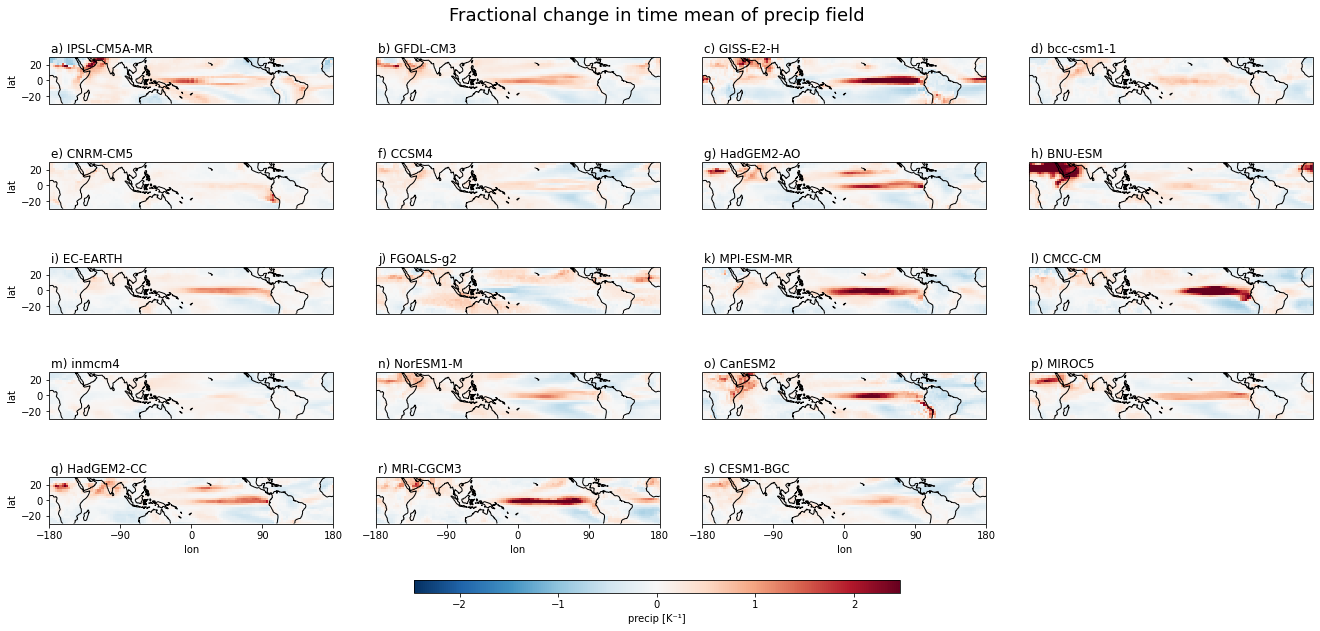

In [ ]:
scene_types = [
    # 'example',
    'experiment',
    # 'difference'
    ]

if limits[0] == 'absolute':
    vmin, vmax = find_limits(variable, datasets, resolutions, experiments, scene_type=scene_types[0], quantile_high=0.975)
else:
    vmin, vmax = None, None 

fig= plt.figure(figsize=(22.5,17.5))
title = 'Fractional change in time mean of {} field'.format(variable)

fig.suptitle(title, fontsize=18, x= 0.575, y=0.80)

for i, dataset in enumerate(datasets):
    for resolution in resolutions:
        for experiment in experiments:
            ax= fig.add_subplot(5,4,i+1,projection=cartopy.crs.PlateCarree(central_longitude=180))

            data = get_dsvariable(variable, dataset, resolution, experiment)[variable].mean(dim=('time'),keep_attrs=True)
            cmap = 'Blues'

            if scene_types[0] == 'difference':
                if dataset == 'GPCP':
                    ax.remove()
                    continue

                data_historical = get_dsvariable(variable, dataset, resolution, experiment='historical')[variable].mean(dim=('time'))
                data_rcp85 = get_dsvariable(variable, dataset, resolution, experiment='rcp85')[variable].mean(dim=('time'))
                aWeights = np.cos(np.deg2rad(data.lat))
                data = (data_rcp85 - data_historical)/data_historical
                data.attrs['units']= 'K'+ chr(0x207B) + chr(0x00B9) 
                cmap = 'RdBu_r'

            y = data

            vmin = -vmax
            pcm = plot_scene(y, cmap=cmap, ax=ax, vmin=-vmax, vmax=vmax)
            letters='abcdefghijklmnopqrst'
            plt.text(-177.5, 35, letters[i] + ') ' + dataset, fontsize=12)

            if (len(datasets)-i)<=4:
                xlabel = 'lon'
                plt.xlabel(xlabel)
                ax.set_xticks([-180, -90, 0, 90, 180])

            if i== 0 or i==4 or i==8 or i==12 or i==16:
                ylabel = 'lat'
                plt.ylabel(ylabel)
                ax.set_yticks([-20, 0, 20])

plt.subplots_adjust(left=0.2, bottom=0.2, right=0.98, top=0.95, wspace=0.15, hspace=-0.8)
cbar_ax = fig.add_axes([0.425, 0.335, 0.3, 0.01])
cbar = fig.colorbar(pcm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('{} [{}]'.format(variable, y.units))


Text(0, 0.5, 'precip [K⁻¹]')

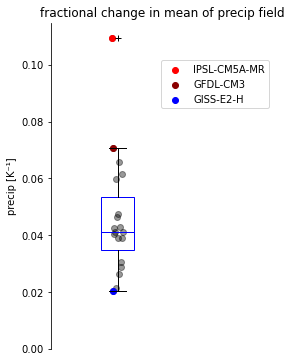

In [ ]:
labels =[
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    'GISS-E2-H',    # 3
    # 'bcc-csm1-1',   # 4
    # 'CNRM-CM5',     # 5
    # 'CCSM4',        # 6
    # 'HadGEM2-AO',   # 7
    # 'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9
    # 'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # 'inmcm4',       # 13
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19
    ]
colors = [
    'r',
    'darkred',
    'b', 
    # 'g'
    ]

scene_types = [
    'difference'
    ]

timeMean_option = [
    # 'experiment',
    'difference'
    ]
vmin, vmax = find_limits(variable, datasets, resolutions, experiments, timeMean_option=timeMean_option, scene_type = scene_types[0])

plt.figure(figsize=(4,6))
title = 'fractional change in mean of {} field'.format(variable)
plt.xlim(0,1)
plt.ylim(vmin*0.95, vmax*1.05)

y= []
for dataset in datasets:
    for resolution in resolutions:
        for experiment in experiments:
            if dataset == 'GPCP':
                continue

            data_historical = get_dsvariable(variable, dataset, resolution, experiment='historical')[variable].mean(dim=('time'))
            data_rcp85 = get_dsvariable(variable, dataset, resolution, experiment='rcp85')[variable].mean(dim=('time'))
            aWeights = np.cos(np.deg2rad(data_historical.lat))
    
            data = (data_rcp85.weighted(aWeights).mean(dim=('lat','lon'),keep_attrs=True) - data_historical.weighted(aWeights).mean(dim=('lat','lon'),keep_attrs=True))/data_historical.weighted(aWeights).mean(dim=('lat','lon'),keep_attrs=True)
            y = np.append(y, data)

plt.boxplot(y,vert=True, positions= [0.3], patch_artist=True, medianprops = dict(color="b",linewidth=1),boxprops = dict(color="b",facecolor='w',zorder=0)
            ,sym='+',flierprops = dict(color="r"))

data.attrs['units']= 'K'+ chr(0x207B) + chr(0x00B9) 
x = np.linspace(0.3-0.025, 0.3+0.025, len(y))
plt.scatter(x, y, c='k', alpha=0.4)

if labels:
    for i, label in enumerate(labels):
        dataset_idx= datasets.index(label)
        plt.scatter(x[dataset_idx],y[dataset_idx],c=colors[i], label=label)
        plt.legend(bbox_to_anchor=(0.6,0.5,0.4,0.4))

plt.xticks([])
sns.despine(top=True, right=True, left=False, bottom=True)
plt.title(title)
plt.ylabel(variable + ' [' + data.units + ']')